In [54]:
from pycocotools.coco import COCO
from matplotlib import pyplot as plt
import os
from PIL import Image
import numpy as np
from tqdm import tqdm

In [36]:
DATASET_FOLDER = '../../../datasets/Abril2023'
IMAGES_FOLDER = "uploaded"
ANNOTATION_FILE = "corte-28-10-2023.json"

In [37]:
coco = COCO(os.path.join(DATASET_FOLDER, ANNOTATION_FILE))


loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


In [38]:
cat_ids = coco.getCatIds()
annotated_ids = list()
for id in range(len(coco.imgs)):
    if len(coco.getAnnIds(imgIds=id, catIds=cat_ids, iscrowd=None)) > 0:
        annotated_ids.append(id)
count = len(annotated_ids)
print(count)

31


In [39]:
dict_attributes = dict()
dict_attributes['Interfase'] = 1
dict_attributes['Profase'] = 2
dict_attributes['Metafase'] = 3
dict_attributes['Anafase'] = 4
dict_attributes['Telofase'] = 5
dict_attributes['Desconocido'] = 6


In [58]:
# Reserve memory
images = np.zeros((len(annotated_ids), 2048, 3072, 1), dtype=np.uint8)
masks = np.zeros_like(images)
# Loop over samples
for idx, image_id in tqdm(enumerate(annotated_ids), total=len(annotated_ids)):
    # Get image info
    img = coco.imgs[image_id]
    # Load image
    images[idx, :, :, 0] = np.asarray(Image.open(os.path.join(DATASET_FOLDER,IMAGES_FOLDER,img['file_name'])).convert('L'))
    # Get labels
    cat_ids = coco.getCatIds()
    anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
    anns = coco.loadAnns(anns_ids)
    # Construct mask
    mask_aux = coco.annToMask(anns[0])
    for i in range(len(anns)):
        mask_aux[coco.annToMask(anns[i]) != 0] = dict_attributes[anns[i]['attributes']['Fase']]
    masks[idx, :, :, 0] = mask_aux



  0%|          | 0/31 [00:00<?, ?it/s]

100%|██████████| 31/31 [00:30<00:00,  1.02it/s]


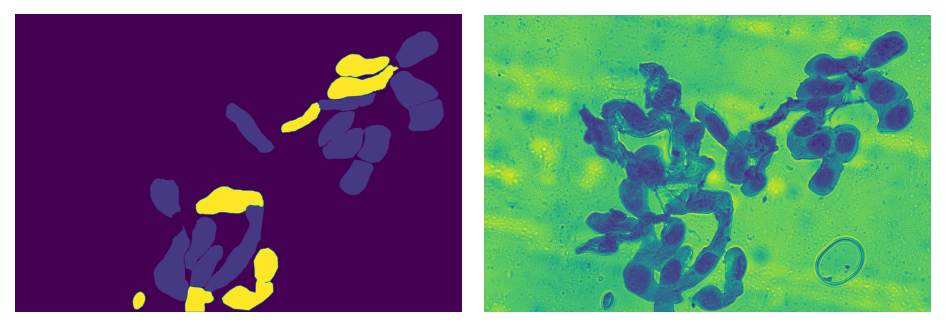

In [63]:
sample_show = 22

plt.figure(dpi=150)
plt.subplot(1,2,1)
plt.imshow(masks[sample_show, :, :, 0])
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(images[sample_show, :, :, 0])
plt.axis("off")
plt.tight_layout()
plt.show()
